### Support Vector Machine:

* SVM is used to classify the elements as well used for regression also
* The classification is done using the plane
    * the two lines which are used to form the form are called as Support vectors
    * The middle line in the plane is called as Maximum margin hyperplane
    * The distace between the two support vectors is called as margin
    * The maximum distance between the two support vectors is called as Maximum margin
    * 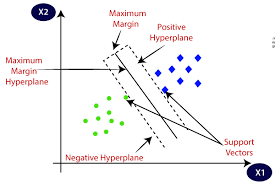

In [1]:
## importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers 

In [6]:
### assiging inputs and outputs to the X and y:

X,y = make_blobs(n_samples = 50,centers = 2,random_state = 0,cluster_std = 0.60)


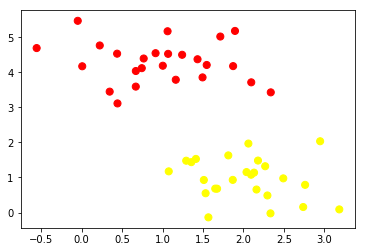

In [8]:
plt.scatter(X[:,0],X[:,1],c = y , s = 50 , cmap = 'autumn')
plt.show()

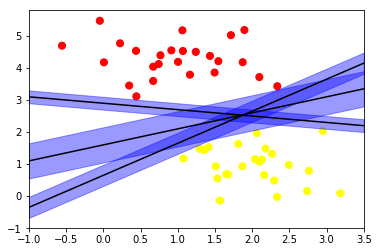

In [10]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c = y,s = 50,cmap = "autumn")

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit,yfit,'k')
    plt.fill_between(xfit,yfit-d,yfit+d,color = 'b',alpha = 0.4)
plt.xlim(-1,3.5)
plt.show()

In [12]:
from sklearn.svm import SVC
model  = SVC(kernel = 'linear',C = 1)
model.fit(X,y)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
## plot the decision function:

def plot_svc_decision_function(model,ax = None,plot_support  = True):
    if ax is None:
        ax = plt.gca()  ### get current axis
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ### plot the decision boundary and margins
    
    ax.contour(X,Y,P,colors = 'k',levels = [-1,0,1],alpha = 0.5,linsetyle = ['--','--','--'])
    
    ## plot supportvectors
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s = 300,linewidth = 5,facecolors = None)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)


C:\Users\Niharikaa\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linsetyle'
  s)


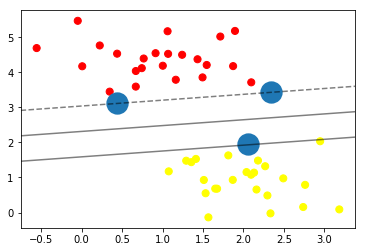

In [27]:
plt.scatter(X[:,0],X[:,1],c = y,s = 50,cmap = "autumn")
plot_svc_decision_function(model)

In [19]:
help(model)

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |